In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv(r"/content/healthcare-dataset-stroke-data.csv")
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: xlabel='stroke'>

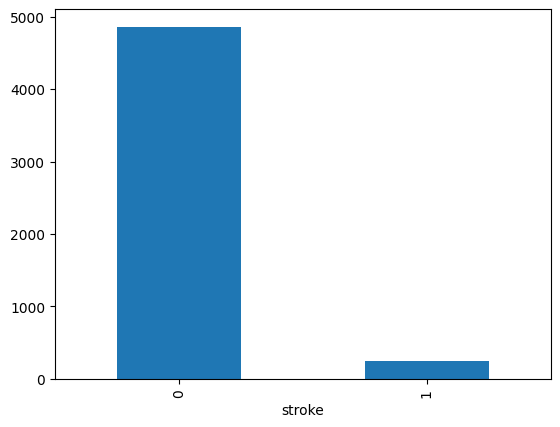

In [ ]:
data['stroke'].value_counts().plot(kind='bar')

<Axes: xlabel='gender'>

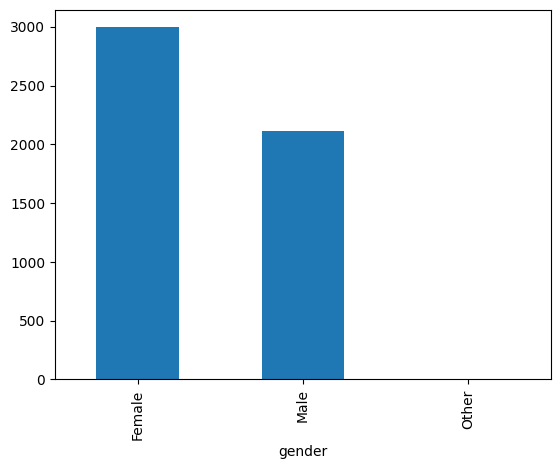

In [ ]:
data['gender'].value_counts().plot(kind='bar')

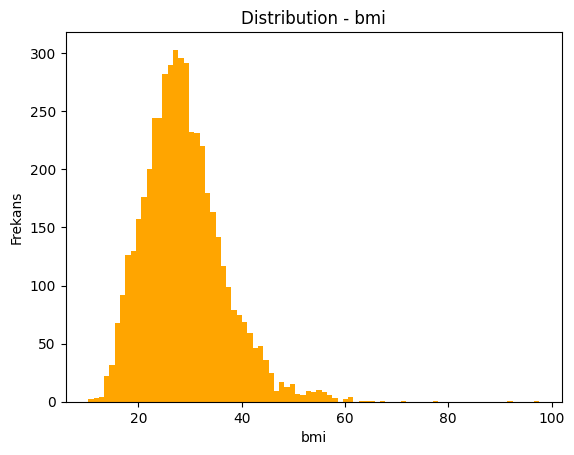

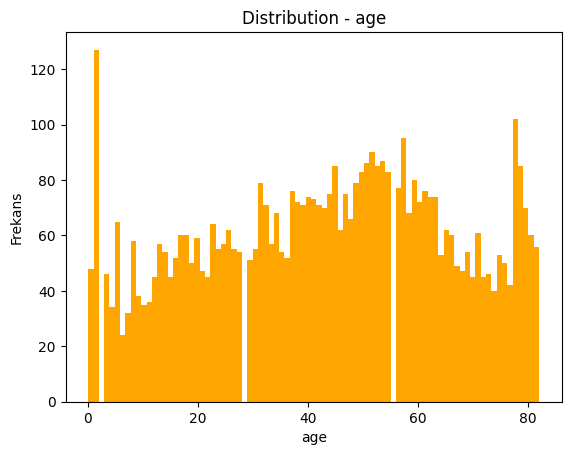

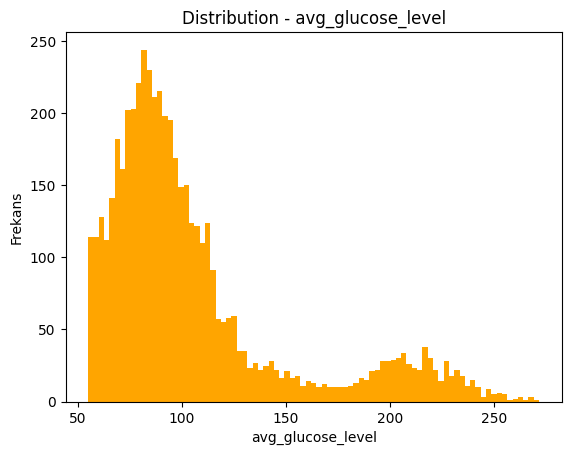

In [ ]:
def plotHistogram(degisken):
    plt.figure()
    plt.hist(data[degisken], bins = 85, color = "orange")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Distribution - {}".format(degisken))
    plt.show()
sayisal_degisken = ["bmi", "age","avg_glucose_level"]
for i in sayisal_degisken:
        plotHistogram(i)

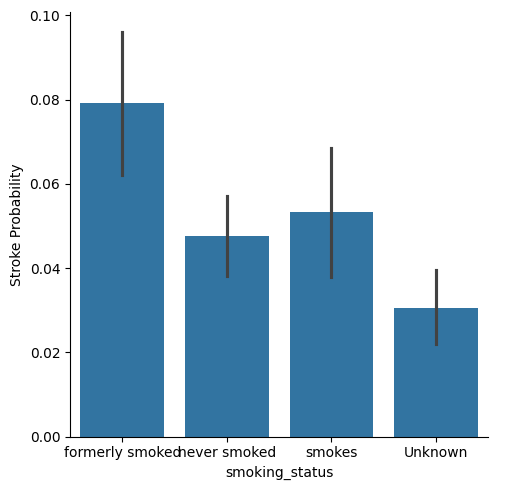

In [ ]:
g = sns.catplot(x = "smoking_status", y = "stroke", kind = "bar", data = data)
g.set_ylabels("Stroke Probability")
plt.show()

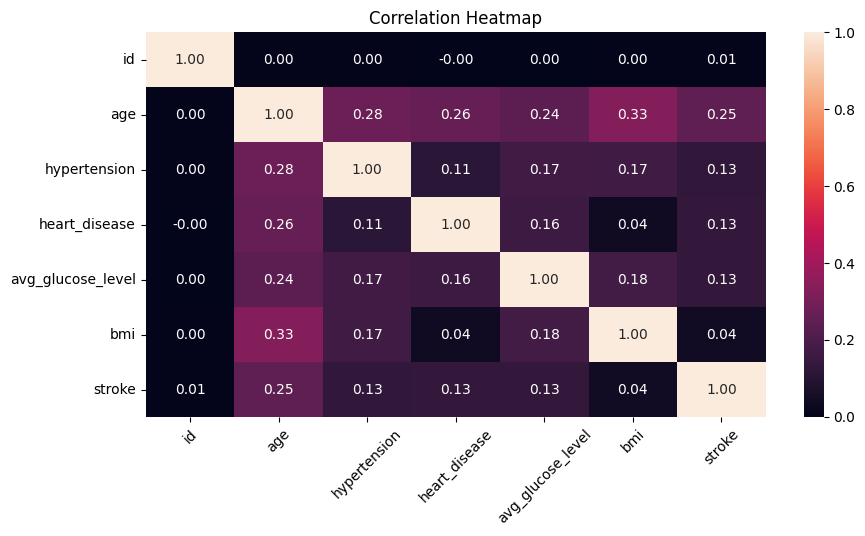

In [ ]:
df_num = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10,5))
sns.heatmap(df_num.corr(),annot=True,fmt=".2f")
plt.xticks(rotation=45)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
data[["hypertension","stroke"]].groupby(["hypertension"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,hypertension,stroke
1,1,0.132530
0,0,0.039679


In [ ]:
data[["smoking_status","stroke"]].groupby(["smoking_status"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,smoking_status,stroke
1,formerly smoked,0.079096
3,smokes,0.053232
2,never smoked,0.047569
0,Unknown,0.030440


In [ ]:
data[["gender","stroke"]].groupby(["gender"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,gender,stroke
1,Male,0.051064
0,Female,0.047094
2,Other,0.000000


In [ ]:
def detect_outliers(data,features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers
data.loc[detect_outliers(data,['age', 'hypertension', 'heart_disease',
       'avg_glucose_level', 'bmi',
       'stroke'])]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
30,43717,Male,57.0,1,0,Yes,Private,Urban,212.08,44.2,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
155,24669,Female,77.0,0,1,Yes,Private,Rural,231.56,36.9,never smoked,1
189,66955,Male,61.0,0,1,Yes,Private,Urban,209.86,NaN,Unknown,1
215,68025,Female,79.0,0,1,No,Private,Urban,205.33,31.0,smokes,1
219,31421,Male,73.0,0,1,Yes,Govt_job,Rural,219.73,28.6,never smoked,1


In [ ]:
df_len = len(data)


In [ ]:
data.columns[data.isnull().any()]


Index(['bmi'], dtype='object')

In [ ]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
data[data["bmi"].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
bmi_mean = data["bmi"].mean()

In [ ]:
data["bmi"] = data["bmi"].fillna(bmi_mean)

In [ ]:
data[data["bmi"].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
data = pd.get_dummies(data, columns= ["gender"])


In [ ]:
encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=["object"]).columns
print(categorical_columns)
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

Index(['ever_married', 'work_type', 'Residence_type', 'smoking_status'], dtype='object')


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
 11  gender_Female      5110 non-null   bool   
 12  gender_Male        5110 non-null   bool   
 13  gender_Other       5110 non-null   bool   
dtypes: bool(3), float64(3), int64(8)
memory usage: 454.2 KB


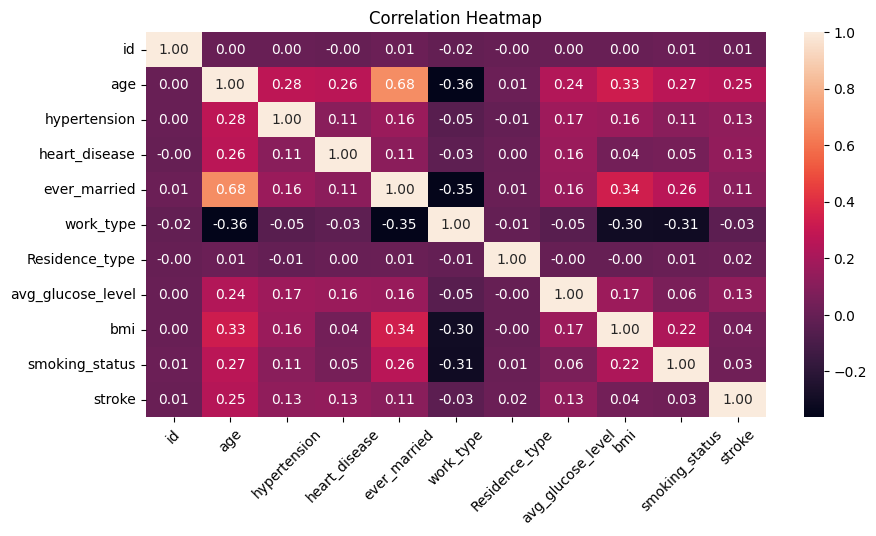

In [ ]:
df_num = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10,5))
sns.heatmap(df_num.corr(),annot=True,fmt=".2f")
plt.xticks(rotation=45)
plt.title("Correlation Heatmap")
plt.show()